# 1.Importing Libraries

In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.express as px
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

# 2.Load dataset

In [3]:
df = pd.read_csv(r"C:\Users\pc\Downloads\disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


# 3. Basic Data Exploration

In [4]:
df.shape

(1450, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


Dataset has 1450 rows and 12 columns having null values in director,cast,country,date_added,and rating column

release_year is showing int data type . remaining all are having object data type.


In [6]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [7]:
df['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [8]:
df["duration"] = df["duration"].astype("int64")
df["season"] = df["season"].astype("int64")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1450 non-null   object        
 1   type          1450 non-null   object        
 2   title         1450 non-null   object        
 3   director      977 non-null    object        
 4   cast          1260 non-null   object        
 5   country       1231 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1450 non-null   int64         
 8   rating        1447 non-null   object        
 9   duration      1450 non-null   int64         
 10  listed_in     1450 non-null   object        
 11  description   1450 non-null   object        
 12  season        1450 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 147.4+ KB


# Handle Missing Values

In [10]:
df.isnull().sum()      # check missing values

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
season            0
dtype: int64

In [11]:
df.duplicated().sum()       # check duplicated values

0

In [15]:
df['country'] = df['country'].fillna(df['country'].mode()[0])


In [16]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!",0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",United States,2021-11-25,2021,NaN,0,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,0
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,0
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",0
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,0


In [17]:
df.isnull().sum() 

show_id           0
type              0
title             0
director        473
cast            190
country           0
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
season            0
dtype: int64

In [19]:
#drop column not needed in analysis 

df= df.drop(['director','cast','date_added'], axis=1)


df

,show_id,type,title,country,release_year,rating,duration,listed_in,description,season
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,0
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,0
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0
3,s4,Movie,The Queen Family Singalong,United States,2021,TV-PG,41,Musical,"This is real life, not just fantasy!",0
4,s5,TV Show,The Beatles: Get Back,United States,2021,NaN,0,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1
...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2009,PG-13,108,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,0
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2009,PG,106,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,0
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2016,PG-13,107,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",0
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States",2003,PG-13,112,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,0


In [20]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          3
duration        0
listed_in       0
description     0
season          0
dtype: int64

In [21]:
df.dropna(how='any',inplace=True)

In [22]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
season          0
dtype: int64

In [23]:
df.shape

(1447, 10)

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'season'],
      dtype='object')

# Now we  have dataset of 1447 rows and 10 columns. No missing values. No duplicate data. 

# EDA

# Contents available

<AxesSubplot:ylabel='type'>

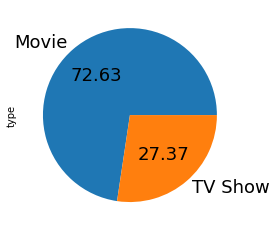

In [24]:
df.type.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

72.63 % movies and 27.37% TV shows are available on Disney+.

More movies are available.

In [25]:
df["type"].value_counts()

Movie      1051
TV Show     396
Name: type, dtype: int64

# Release Year 

<AxesSubplot:xlabel='release_year', ylabel='Count'>

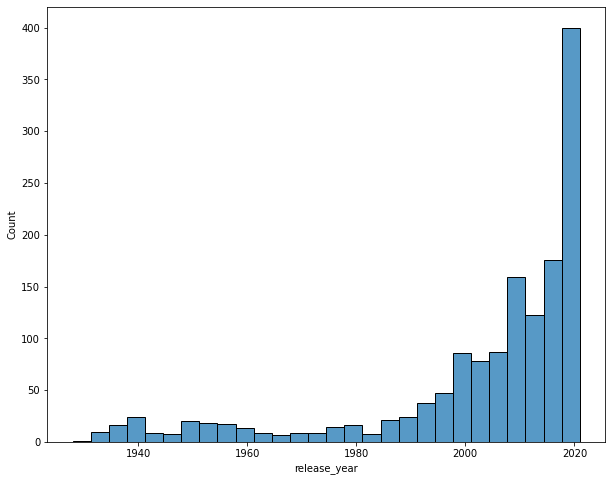

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(x=df["release_year"])
#plt.title("Release Years", size=15)
#plt.show()

In [27]:
df["release_year"].value_counts().head(10)

2021    123
2020    114
2019     98
2017     69
2018     65
2016     61
2011     52
2014     50
2015     46
2012     41
Name: release_year, dtype: int64

<AxesSubplot:ylabel='Frequency'>

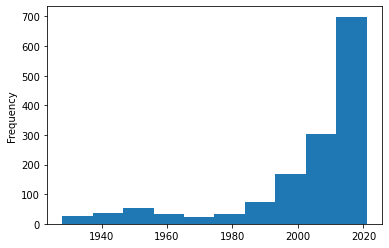

In [28]:
df['release_year'].plot(kind = 'hist')

<AxesSubplot:xlabel='release_year', ylabel='Count'>

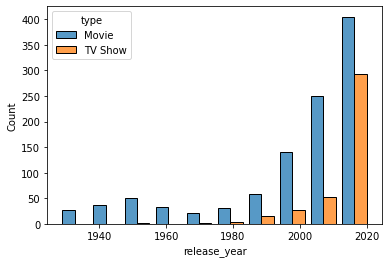

In [29]:
sns.histplot(data=df, x="release_year",bins=10,hue='type',multiple="dodge", shrink=.8)

Maximum no. of movies and TV shows are released in 2021 followed by 2020.

Also it shows almost every dacade more movies have released than TV shows. 

# Content Ratings

In [30]:
df["rating"].value_counts()

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

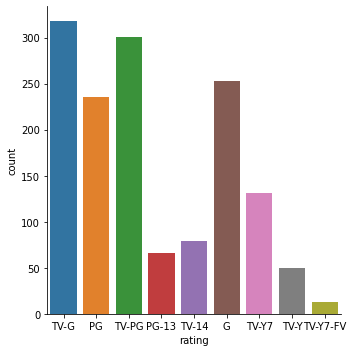

In [31]:
sns.catplot(x ='rating', kind = 'count',  data = df )    # hue = 'type'

<AxesSubplot:xlabel='rating', ylabel='Count'>

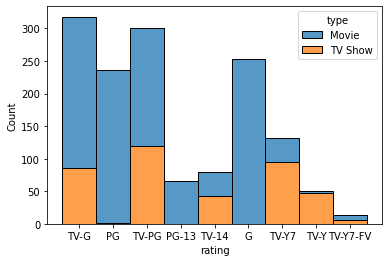

In [32]:
sns.histplot(data=df, x="rating", hue="type", multiple="stack")

Maximum shows has TV-G rating that is 318 shows followed by TV-PG,G and then PG.

Minimum shows has TV-Y7-FV rating.

Most of the movies has good rating than TV shows.

# Country analysis

In [33]:
country_sep=df['country'].str.split(',', expand=True,n=15)
country_sep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,United States,United Kingdom,None,None,None,None,None,None,None,None,None,None,None,None,None
1446,United States,Canada,None,None,None,None,None,None,None,None,None,None,None,None,None
1447,United Kingdom,Germany,United States,None,None,None,None,None,None,None,None,None,None,None,None
1448,United Kingdom,Germany,United States,None,None,None,None,None,None,None,None,None,None,None,None


In [34]:
country_col= country_sep.count()
country_col

0     1447
1      188
2       57
3       20
4       11
5        5
6        3
7        3
8        2
9        2
10       2
11       1
12       1
13       1
14       1
dtype: int64

In [35]:
country_count= country_col.sum()
country_count

1744

In [36]:
#country_count = df.copy()
country_count = pd.concat([df, df['country'].str.split(',', expand=True)])
country_count = country_count.melt(id_vars = ['type', 'title'], value_vars = range(15), value_name = 'country')
# https://www.geeksforgeeks.org/python-pandas-dataframe-melt/

country_count = country_count[country_count['country'].notna()]
country_count

C:\Users\pc\AppData\Local\Temp/ipykernel_8656/3218896549.py:3: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



,type,title,variable,country
1447,NaN,NaN,0,United States
1448,NaN,NaN,0,United States
1449,NaN,NaN,0,United States
1450,NaN,NaN,0,United States
1451,NaN,NaN,0,United States
...,...,...,...,...
31480,NaN,NaN,10,India
34374,NaN,NaN,11,Syria
37268,NaN,NaN,12,Iran
40162,NaN,NaN,13,Egypt


In [37]:
#fig = plt.figure(figsize=[20,5]) 
df1=df.groupby('country').count()
df1
#df1.get_group('United States')

,show_id,type,title,release_year,rating,duration,listed_in,description,season
country,,,,,,,,,
Argentina,2,2,2,2,2,2,2,2,2
"Argentina, Mexico",1,1,1,1,1,1,1,1,1
"Australia, United Kingdom",1,1,1,1,1,1,1,1,1
"Australia, United States",3,3,3,3,3,3,3,3,3
"Austria, South Africa",1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
"United States, United Kingdom, Belgium, Canada",1,1,1,1,1,1,1,1,1
"United States, United Kingdom, Canada",3,3,3,3,3,3,3,3,3
"United States, United Kingdom, Hungary",1,1,1,1,1,1,1,1,1


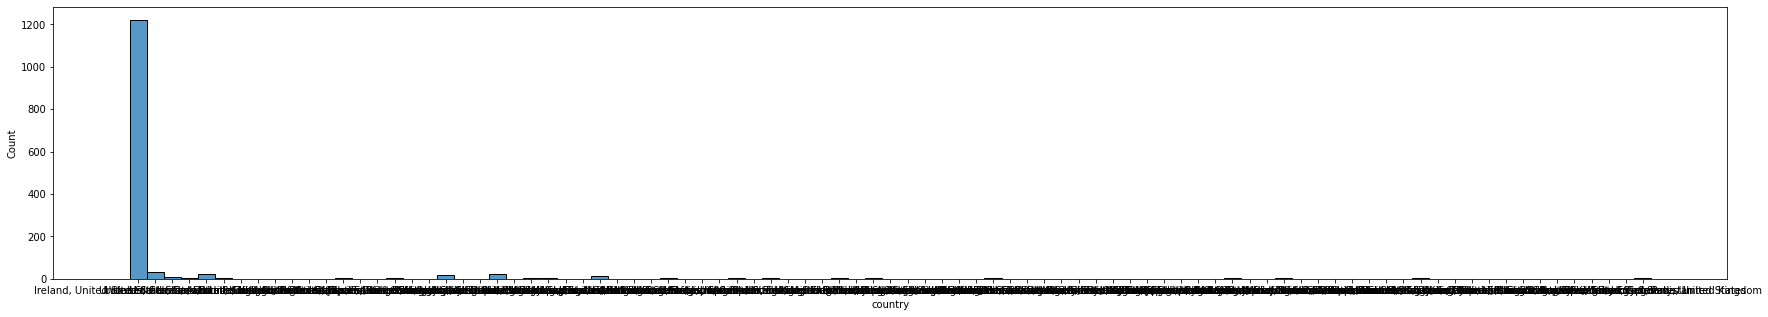

In [38]:
fig1 = plt.figure(figsize=[30,5]) 
g=sns.histplot(data=df, x="country")
#g.fig.autofmt_xdate(bottom=0.2, rotation=90)
#plt.xticks(rotation=90)

United States has maximum no.of movies and TV shows

# Listed in analysis

In [39]:
df['listed_in'].str.split(',', expand=True)

,0,1,2
0,Animation,Family,None
1,Comedy,None,None
2,Animation,Comedy,Family
3,Musical,None,None
5,Biographical,Documentary,None
...,...,...,...
1445,Action-Adventure,Family,Science Fiction
1446,Action-Adventure,Comedy,Family
1447,Biographical,Comedy,Drama
1448,Buddy,Comedy,Coming of Age


In [40]:
genre_count = pd.concat([df, df['listed_in'].str.split(',', expand=True)])
genre_count = genre_count.melt(id_vars = ['type', 'title'], value_vars = range(3), value_name = 'genre')
genre_count = genre_count[genre_count['genre'].notna()]
genre_count

,type,title,variable,genre
1447,NaN,NaN,0,Animation
1448,NaN,NaN,0,Comedy
1449,NaN,NaN,0,Animation
1450,NaN,NaN,0,Musical
1451,NaN,NaN,0,Biographical
...,...,...,...,...
8677,NaN,NaN,2,Science Fiction
8678,NaN,NaN,2,Family
8679,NaN,NaN,2,Drama
8680,NaN,NaN,2,Coming of Age


In [41]:
fig = px.histogram(data_frame= genre_count, x = ['genre'], title="Genre of the Movies")
fig.show()

Family type genre has maximum count followed by Action and then Animation

# Duration and Season Analysis

In [42]:
# Groupby Movie and aggregate time duration


df['type']=='Movie'

movies_df= df[df['type']=='Movie']

movies_df['duration']

movies_df_agg= movies_df.groupby('release_year', as_index=False)['duration'].mean()

movies_df_agg


,release_year,duration
0,1928,8.000000
1,1932,7.666667
2,1933,8.666667
3,1934,8.750000
4,1935,9.750000
...,...,...
85,2017,80.272727
86,2018,80.187500
87,2019,59.400000
88,2020,66.054054


Text(0.5, 1.0, 'Time Duration of Disney Movies 1920s to 2021')

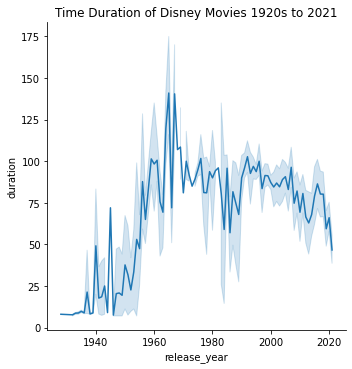

In [43]:
sns.relplot(
    data=movies_df, 
    x="release_year", y="duration", 
    kind="line")
plt.title('Time Duration of Disney Movies 1920s to 2021')

Maximum time duration of movies goes upto 140 min during 1960 to 1970.